In [7]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [17]:
all_data = pd.read_csv("../data/ifng_test_w_parts_w_binding_scores_w_iedb.csv")
test_data = all_data.dropna(axis=0)
labels = [min(1,x) for x in test_data["positive_subjects"]]
test_data.insert(0,"labels",labels)

In [18]:
test_data

,labels,Unnamed: 0,peptide,HLA_allele,potential,tested_subjects,positive_subjects,immunogenicity,parts,binding_score,IEDB_predictions
0,0,0,YRLWHYPCTI,HLA-C*07:01,0.043478,21,0,Negative,7.0,0.97795,0.21393
1,0,1,MIVAWFLLLI,HLA-A*02:01,0.083333,10,0,Negative,4.0,0.87731,0.35619
2,0,2,LVYVNGVVV,HLA-A*02:01,0.125000,6,0,Negative,3.0,0.96008,0.12490
3,0,3,LLIGICVAV,HLA-A*02:01,0.083333,10,0,Negative,6.0,0.99252,0.21385
4,0,4,FAVQTIVFI,HLA-A*02:01,0.083333,10,0,Negative,0.0,0.96905,0.16316
...,...,...,...,...,...,...,...,...,...,...,...
2803,1,2803,SPRWYFYYL,HLA-B*07:02,0.666667,1,1,Positive,2.0,0.99897,0.34101
2804,0,2804,LLLFHSYAI,HLA-A*02:01,0.083333,10,0,Negative,1.0,0.99262,0.00971
2805,0,2805,CTDDNALAYY,HLA-A*01:01,0.142857,5,0,Negative,6.0,0.99994,0.08174
2806,0,2806,ILMALFGIKL,HLA-A*02:01,0.083333,10,0,Negative,8.0,0.98532,0.10379


In [21]:
fpr, tpr, threshold = metrics.roc_curve(test_data["labels"].astype('int'),test_data["binding_score"].astype('float'))
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
precision, recall, thresholds = metrics.precision_recall_curve(test_data["labels"].astype('int'),test_data["binding_score"].astype('float'))
PR_auc = metrics.auc(recall, precision)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


KeyError: 'binding_scores'

0.48678681011182795


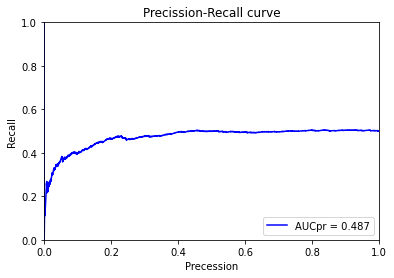

0.47210351315192767


In [20]:
fpr, tpr, threshold = metrics.roc_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
precision, recall, thresholds = metrics.precision_recall_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
PR_auc = metrics.auc(recall, precision)
plt.title('Precission-Recall curve')
plt.plot(recall, precision, 'b', label = 'AUCpr = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Recall')
plt.xlabel('Precession')
plt.show()
print(PR_auc)